In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

folderpath = "output/"
filenameTime = "1ms_parsed_time.txt"
filenameTrx = "1ms_parsed_trx.txt"
with open(folderpath+filenameTime) as f:
        timeStr = f.read().replace(",","").split('\n')[:-1]
with open(folderpath+filenameTrx) as f:
        trxStr =  f.read().replace(",","").split('\n')[:-1]
#         print(trxStr)
timeList = np.array(map(float, timeStr))/1000.0
trxList = np.array(map(int,trxStr))


In [3]:
assert len(timeList)==len(trxList),"Error"
trxUnique = []
trxPresent = {}
startTime = {}
endTime = {}
prevTrx = None
for i in range(len(timeList)):
    time = timeList[i]
    trx = trxList[i]
    if trx not in trxPresent:
        trxPresent[trx] = True
        trxUnique.append(trx)
    if trx is not prevTrx:
        startTime[trx] = time
    endTime[trx] = time
    prevTrx = trx
    
trxUnique[-1]    
    
        

571

In [4]:
diffTime = {}
limTrans = 1000
for trx1 in trxUnique:
    for trx2 in trxUnique:
        if(trx2<=trx1):
            continue
        if(trx2-trx1>limTrans):
            break
        diffTrans = trx2-trx1
        if diffTrans not in diffTime:
            diffTime[diffTrans] = []
        diffTime[diffTrans].append(startTime[trx2]-endTime[trx1])

In [5]:
trxListPlot = []
avgTimeList = []
variationTimeList = []
stdTimeList = []
for diff in diffTime:
    trxListPlot.append(diff)
    avgTimeList.append(np.mean(diffTime[diff]))
    variationTimeList.append(scipy.stats.variation(diffTime[diff]))
    stdTimeList.append(np.std(diffTime[diff]))
avgTimeList = np.array(avgTimeList)
# stdTimeList = np.array()

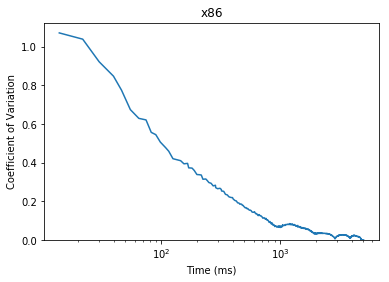

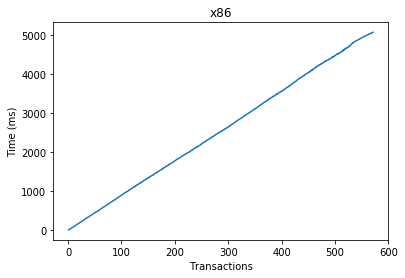

In [6]:
plt.figure(1)
plt.plot(avgTimeList,variationTimeList)
plt.xlabel("Time (ms)")
plt.ylabel("Coefficient of Variation")
plt.xscale('log')
plt.ylim(ymin=0)
plt.title("x86")
plt.savefig("variation_timex86.png")
plt.show()
plt.figure(2)
plt.plot(trxListPlot,avgTimeList)
# plt.plot(trxListPlot,avgTimeList+stdTimeList)
# plt.plot(trxListPlot,avgTimeList-stdTimeList)
plt.ylabel("Time (ms)")
plt.xlabel("Transactions")
plt.title("x86")
plt.savefig("time_transactionsx86.png")
plt.show()
